## Instructions for Using the Comprehensive Spotify Analysis Program

### 1. **Requirements**:
   - **Python version**: Make sure you have Python 3.x installed on your system.
   - **Spotify Data**: You’ll need to request your Spotify listening data, which comes in JSON format. To request this data:
     1. Log into your Spotify account.
     2. Go to [Spotify Privacy Settings](https://www.spotify.com/us/account/privacy/).
     3. Request your listening data, and Spotify will email you a link when it's ready to download.

### 2. **Required Libraries**:
   You’ll need the following Python libraries to run the program:
   - **`pandas`**: For data analysis.
   - **`matplotlib`**: For generating charts.
   - **`folium`**: For creating interactive maps.
   - **`geoip2`**: For geolocating IP addresses using the GeoLite2 database.

   You can install these using `pip`:
   ```bash
   pip install pandas matplotlib folium geoip2
   ```

### 3. **Download the GeoLite2 Database**:
   To geolocate the IP addresses, you need the **GeoLite2-City** database:
   1. Go to the [MaxMind GeoLite2 website](https://dev.maxmind.com/geoip/geolite2-free-geolocation-data).
   2. Create a free MaxMind account (if you don't have one).
   3. Download the **GeoLite2-City** database in `.tar.gz` format.
   4. Extract the `GeoLite2-City.mmdb` file from the archive.

### 4. **Program Setup**:
   1. **Spotify Data**: Ensure the JSON files containing your Spotify listening data are downloaded and stored in a folder (e.g., `C:\Users\eshaa\Downloads\Spotify Extended Streaming History`).
   2. **GeoLite2 Database**: Make sure you have the `GeoLite2-City.mmdb` file extracted from the downloaded archive.

### 5. **Adjust File Paths**:
   In the script, modify the following variables to point to your specific file locations:
   ```python
   # Path to the Spotify data directory
   data_directory = r'C:\Users\eshaa\Downloads\Spotify Extended Streaming History'  # Change this to your directory

   # Path to the GeoLite2-City.mmdb file
   geoip_db_path = r'C:\Users\eshaa\Downloads\GeoLite2-City.mmdb'  # Change this to the location of your mmdb file
   ```

### 6. **Running the Program**:
   After adjusting the paths, you can run the program. Here's what it will do:
   
   - **Load Spotify Data**: It reads your Spotify JSON data and processes it into a `pandas` DataFrame.
   - **Basic Statistics**: Displays statistics like the total number of streams, total listening time in minutes, the most played track, and the most played artist.
   - **Visualize Data**:
     - **Monthly Streaming Activity**: Plots your listening time (in minutes) by month.
     - **Top Artists and Tracks**: Displays bar charts of your top 10 most played artists and tracks (in minutes).
   - **Geolocate Streams**: Uses the `geoip2` library and the **GeoLite2-City** database to geolocate IP addresses from the streams.
   - **Interactive Map**: Creates an interactive map of your streams based on IP geolocation and saves it as an HTML file (`spotify_streams_map.html`), which can be opened in any web browser.

### 7. **Expected Outputs**:
   - **Terminal Output**:
     - Basic statistics, such as the total number of streams and top tracks/artists.
     - Geolocated IP addresses and their corresponding country and city.
   - **Charts**:
     - Line graph of streaming activity over time (minutes).
     - Bar charts for the top artists and tracks played (in minutes).
   - **Map**:
     - An interactive map (`spotify_streams_map.html`) showing the location of streams based on IP addresses.

### 8. **Viewing the Map**:
   The program will generate and save an interactive map as an HTML file (`spotify_streams_map.html`). You can open this file in any web browser to explore your stream locations.

---

### Troubleshooting:
- **Missing Libraries**: If you encounter `ModuleNotFoundError`, ensure you have installed the necessary libraries using `pip`.
- **FileNotFoundError**: If the program can’t find your Spotify JSON files or the **GeoLite2-City.mmdb** file, make sure the paths are correct and that the files exist in those locations.
- **Missing Spotify Data**: Ensure you've requested and downloaded your Spotify data from the **Spotify Privacy Settings** page.


--- Basic Statistics ---
Total streams: 240992
Total time played (minutes): 542930.50
Most played track: Danza Kuduro
Most played artist: Owl City

Platform usage:
 platform
ios                                                                          26189
Android OS 4.2.2 API 17 (TCT, ALCATEL ONE TOUCH Fierce)                      22518
iOS 13.3.1 (iPhone9,2)                                                       18052
Android OS 5.0 API 21 (BLU, BLU STUDIO XL)                                   15980
OS X 10.11.0 [x86 4]                                                         13062
                                                                             ...  
Partner google cast_voice;Google_Home_Mini;;5.9.4--1.56.500000                   1
web_player windows 10;firefox 60.0;desktop                                       1
Partner google cast_tv;Chromecast_Tv_Gen1;;2.0.0-357-22b28ee--1.29.104827        1
Partner google cast_voice;Google_Home;;4.7.4--1.54.250118                     

C:\Users\eshaa\AppData\Local\Temp\ipykernel_29296\61136541.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.groupby(pd.Grouper(key='ts', freq='M'))['ms_played'].sum() / (1000 * 60)  # Convert to minutes
C:\Users\eshaa\AppData\Local\Temp\ipykernel_29296\61136541.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df_grouped.asfreq('M', fill_value=0)


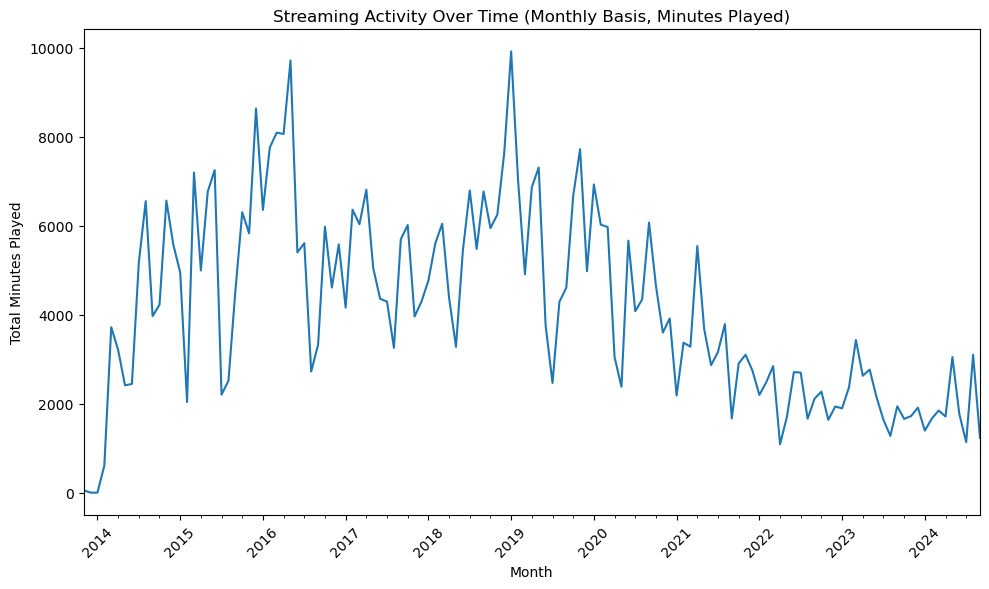


--- Top 10 Most Played Artists ---


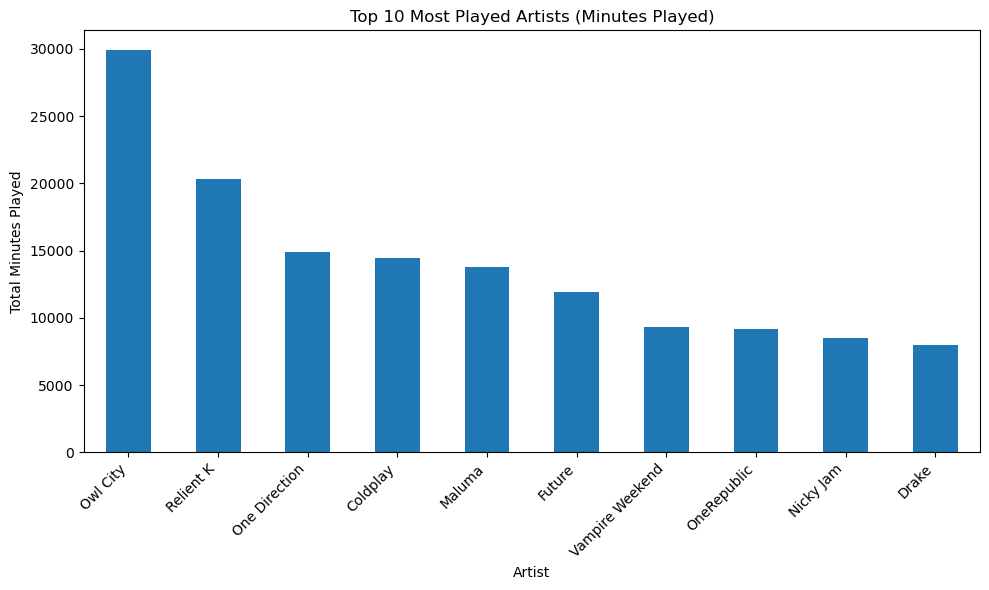


--- Top 10 Most Played Tracks ---


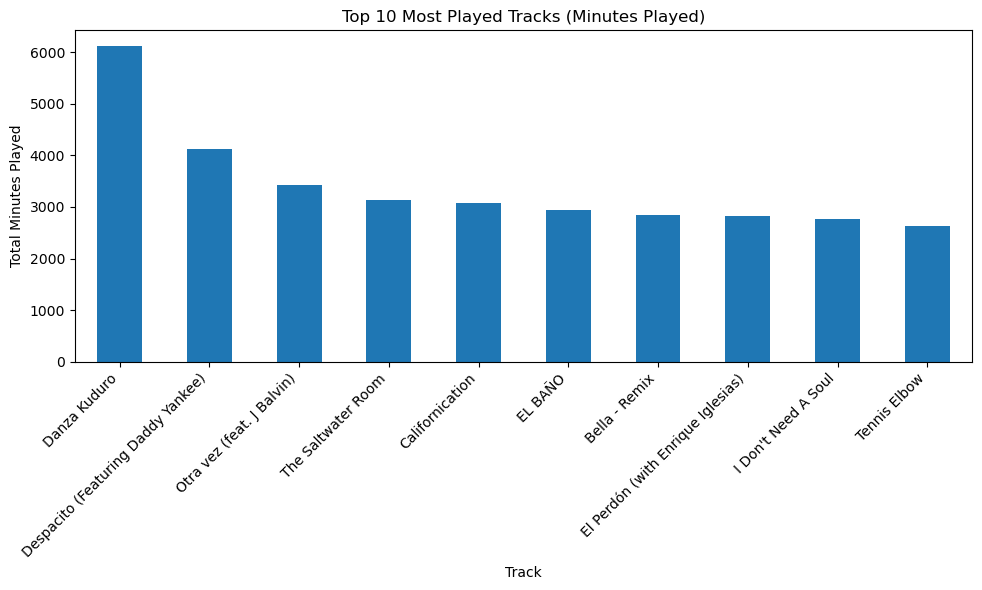

            ip        country     city  latitude  longitude
0  97.96.42.34  United States  Parrish   27.5595   -82.3934
1  97.96.42.34  United States  Parrish   27.5595   -82.3934
2  97.96.42.34  United States  Parrish   27.5595   -82.3934
3  97.96.42.34  United States  Parrish   27.5595   -82.3934
4  97.96.42.34  United States  Parrish   27.5595   -82.3934
Full map saved as spotify_streams_full_map.html
Clustered map saved as spotify_streams_clustered_map.html


In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import geoip2.database
import folium
from folium.plugins import MarkerCluster
from glob import glob

# Function to load and combine all JSON files
def load_spotify_data(data_directory):
    json_files = glob(os.path.join(data_directory, '*.json'))
    all_data = []

    for file in json_files:
        try:
            with open(file, 'r', encoding='utf-8', errors='ignore') as f:
                data = json.load(f)
                all_data.extend(data)
        except UnicodeDecodeError as e:
            print(f"Error reading {file}: {e}")

    return all_data

# Function to convert JSON data to pandas DataFrame
def json_to_dataframe(data):
    return pd.DataFrame(data)

# Function to show basic statistics of your listening history
def basic_statistics(df):
    total_streams = len(df)
    total_time_ms = df['ms_played'].sum()
    total_time_minutes = total_time_ms / (1000 * 60)  # Convert to minutes
    most_played_track = df.groupby('master_metadata_track_name')['ms_played'].sum().idxmax()
    most_played_artist = df.groupby('master_metadata_album_artist_name')['ms_played'].sum().idxmax()
    platform_usage = df['platform'].value_counts()

    print(f"Total streams: {total_streams}")
    print(f"Total time played (minutes): {total_time_minutes:.2f}")
    print(f"Most played track: {most_played_track}")
    print(f"Most played artist: {most_played_artist}")
    print("\nPlatform usage:\n", platform_usage)

# Function to plot streaming activity over time on a monthly basis (in minutes)
def plot_streaming_by_month(df):
    df['ts'] = pd.to_datetime(df['ts'], errors='coerce')
    df = df.sort_values(by='ts')
    df_grouped = df.groupby(pd.Grouper(key='ts', freq='M'))['ms_played'].sum() / (1000 * 60)  # Convert to minutes
    df_grouped = df_grouped.asfreq('M', fill_value=0)

    plt.figure(figsize=(10, 6))
    df_grouped.plot(kind='line')
    plt.title('Streaming Activity Over Time (Monthly Basis, Minutes Played)')
    plt.xlabel('Month')
    plt.ylabel('Total Minutes Played')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot top N most played artists (in minutes)
def plot_top_artists_in_minutes(df, n=10):
    top_artists = df.groupby('master_metadata_album_artist_name')['ms_played'].sum().sort_values(ascending=False).head(n) / (1000 * 60)
    plt.figure(figsize=(10, 6))
    top_artists.plot(kind='bar')
    plt.title(f'Top {n} Most Played Artists (Minutes Played)')
    plt.xlabel('Artist')
    plt.ylabel('Total Minutes Played')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Function to plot top N most played tracks (in minutes)
def plot_top_tracks_in_minutes(df, n=10):
    top_tracks = df.groupby('master_metadata_track_name')['ms_played'].sum().sort_values(ascending=False).head(n) / (1000 * 60)
    plt.figure(figsize=(10, 6))
    top_tracks.plot(kind='bar')
    plt.title(f'Top {n} Most Played Tracks (Minutes Played)')
    plt.xlabel('Track')
    plt.ylabel('Total Minutes Played')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Load GeoLite2 database
def load_geoip_database(db_path):
    return geoip2.database.Reader(db_path)

# Function to geolocate IP addresses
def geolocate_ips(df, geoip_reader):
    location_data = []
    
    for ip in df['ip_addr_decrypted']:
        try:
            response = geoip_reader.city(ip)
            location_data.append({
                'ip': ip,
                'country': response.country.name,
                'city': response.city.name,
                'latitude': response.location.latitude,
                'longitude': response.location.longitude
            })
        except Exception as e:
            location_data.append({
                'ip': ip,
                'country': None,
                'city': None,
                'latitude': None,
                'longitude': None
            })
    
    return pd.DataFrame(location_data)

# Function to create both a full map and a clustered map without point limitation
def create_full_and_clustered_maps(df, map_width=800, map_height=600, zoom_start=2):
    # Full Map - Display all points without clustering
    full_map = folium.Map(location=[20, 0], zoom_start=zoom_start, width=map_width, height=map_height)

    for _, row in df.iterrows():
        if not pd.isnull(row['latitude']) and not pd.isnull(row['longitude']):
            folium.Marker(
                location=[row['latitude'], row['longitude']],
                popup=f"City: {row['city']}, Country: {row['country']}"
            ).add_to(full_map)

    # Save the full map
    full_map.save("spotify_streams_full_map.html")
    print(f"Full map saved as spotify_streams_full_map.html")

    # Clustered Map - Use marker clustering
    clustered_map = folium.Map(location=[20, 0], zoom_start=zoom_start, width=map_width, height=map_height)
    marker_cluster = MarkerCluster().add_to(clustered_map)

    for _, row in df.iterrows():
        if not pd.isnull(row['latitude']) and not pd.isnull(row['longitude']):
            folium.Marker(
                location=[row['latitude'], row['longitude']],
                popup=f"City: {row['city']}, Country: {row['country']}"
            ).add_to(marker_cluster)

    # Save the clustered map
    clustered_map.save("spotify_streams_clustered_map.html")
    print(f"Clustered map saved as spotify_streams_clustered_map.html")


# Main execution
if __name__ == "__main__":
    # Directory containing your Spotify JSON files
    data_directory = r'C:\Users\eshaa\Downloads\Spotify Extended Streaming History'  # Adjust this path
    
    # Path to the GeoLite2 database
    geoip_db_path = r'C:\Users\eshaa\Downloads\GeoLite2-City_20241001\GeoLite2-City_20241001\GeoLite2-City.mmdb'  # Adjust this path

    # Load and process the data
    spotify_data = load_spotify_data(data_directory)
    if spotify_data:
        spotify_df = json_to_dataframe(spotify_data)

        # Show basic statistics
        print("\n--- Basic Statistics ---")
        basic_statistics(spotify_df)

        # Plot monthly streaming activity
        print("\n--- Streaming Activity Over Time ---")
        plot_streaming_by_month(spotify_df)

        # Plot top artists and tracks
        print("\n--- Top 10 Most Played Artists ---")
        plot_top_artists_in_minutes(spotify_df, n=10)
        
        print("\n--- Top 10 Most Played Tracks ---")
        plot_top_tracks_in_minutes(spotify_df, n=10)

        # Load GeoLite2 database for IP geolocation
        geoip_reader = load_geoip_database(geoip_db_path)
        
        # Geolocate IP addresses
        location_df = geolocate_ips(spotify_df, geoip_reader)
        print(location_df.head())  # Show geolocated IPs

        # Generate both full map and clustered map without point limitation
        create_full_and_clustered_maps(location_df, map_width=600, map_height=400, zoom_start=2)
    else:
        print("No data found or could not load data.")
